# &#x1F3E2; PREPARAÇÃO DO AMBIENTE

Install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://pepy.tech/project/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

---

## &#x1F310; CRIAÇÃO DO AMBIENTE VIRTUAL

**Os comandos abaixo devem ser executados no terminal para criação do ambiente virtual, na seguinte sequência:**

```bash
conda create -n env_yolo python=3.0
conda activate env_yolo
pip install ultralytics
conda install -c pytorch -c conda-forge pytorch torchvision cpuonly ultralytics
pip install torch --force-reinstall
```
---

### &#x1F449; Verificar a versão do PyTorch

In [1]:
import torch
print(torch.__version__)

2.4.0


---

### &#x1F449; Importar o Ultralytics e rodar as verificações

In [2]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.2.66  Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
Setup complete  (8 CPUs, 15.4 GB RAM, 119.9/235.5 GB disk)


---

# &#x1F4C8; PREDIÇÕES / INFERÊNCIAS
YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).

### &#x1F449; Remover diretórios de resultados anteriores (opcional)

In [7]:
import shutil
import os

# if os.path.exists('runs/'):
#     shutil.rmtree('runs/')

---

### &#x1F440; (A) RODAR INFERÊNCIA DE UMA IMAGEM COM YOLOv8n

#### 1. Importar as bibliotecas de manipulação de imagens

In [5]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

#### 2. Rodar a inferência &#x1F50E;

In [5]:
# !yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.2.66 🚀 Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 c:\Users\saothalm\Documents\ia_visao_thayna\notebooks\4_Deteccao_Objetos\zidane.jpg: 384x640 2 persons, 1 tie, 82.7ms
Speed: 0.0ms preprocess, 82.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#### 3. Exibir resultado visual &#x1F39E;	

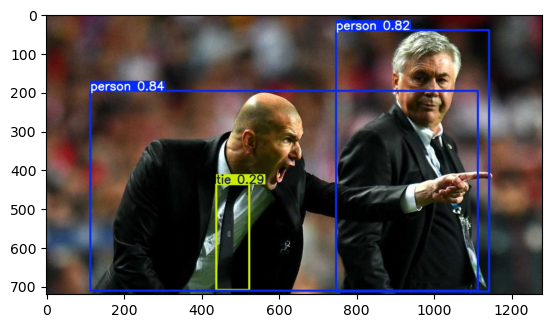

In [7]:
result_image = Image.open('runs\detect\predict\zidane.jpg')

plt.imshow(result_image)

#
---

### &#x1F40D; (B) INFERÊNCIAS UTILIZANDO PYTHON >>> DETECÇÃO DE OBJETOS <<<
YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

#### 1. IMPORTAR AS BIBLIOTECAS

In [1]:
from ultralytics import YOLO

<hr style="border: 1px solid black;"/>

#### 2. CARREGAR O MODELO
```python
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')    # load a pretrained model (recommended for training)
```

In [2]:
model = YOLO("yolov8n.pt")

<hr style="border: 1px solid black;"/>

#### 3. UTILIZAR O MODELO <<< DETECÇÃO DE OBJETOS >>>

```python
results = model.train(data='coco8.yaml', epochs=3)         # train the model
results = model.val()                                      # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')                      # export the model to ONNX format
```

<hr style="border: 1px solid black;"/>

##### 3.1. TREINAR O MODELO

In [15]:
# results = model.train(data='coco8.yaml', epochs=3)

<hr style="border: 1px solid black;"/>

##### 3.2. AVALIAR O DESEMPENHO DO MODELO NO CONJUNTO DE VALIDAÇÃO

In [16]:
# results = model.val()

<hr style="border: 1px solid black;"/>

##### 3.3. REALIZAR PREDIÇÃO/INFERÊNCIA SOBRE UMA IMAGEM
A _flag_ **show=True** abre uma janela independente com a imagem exibida com os objetos detectados.
Foi identificado um problema com a execução da mesma (o Python para de responder)
```python
# exemplo
results = model('https://ultralytics.com/images/bus.jpg', show=True)



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\saothalm\Documents\ia_visao_thayna\notebooks\4_Deteccao_Objetos\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 142.1ms
Speed: 11.8ms preprocess, 142.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


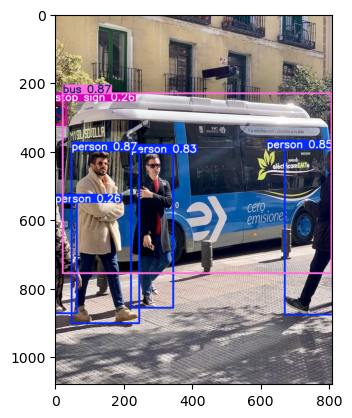

In [21]:
import matplotlib.pyplot as plt

results = model('https://ultralytics.com/images/bus.jpg')

# Exibir a imagem resultante com as previsões desenhadas
img = results[0].plot()
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_result)


image 1/1 c:\Users\saothalm\Documents\ia_visao_thayna\notebooks\4_Deteccao_Objetos\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 163.8ms
Speed: 1.0ms preprocess, 163.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


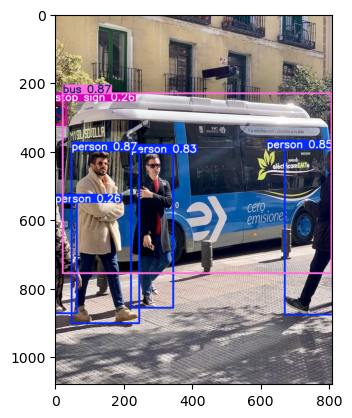

In [22]:
results2 = model.predict(source='bus.jpg')

# Exibir a imagem resultante com as previsões desenhadas
img = results2[0].plot()
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_result)

In [23]:
results = model.export(format='onnx')  # export the model to ONNX format

Ultralytics YOLOv8.2.66  Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.16.1 opset 19...
ONNX: export success  1.7s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (3.9s)
Results saved to C:\Users\saothalm\Documents\ia_visao_thayna\notebooks\4_Deteccao_Objetos
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


#
---

### &#x1F40D; (B) INFERÊNCIAS UTILIZANDO PYTHON >>> CLASSIFICAÇÃO DE OBJETOS <<<
Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it


In [27]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')                      # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)              # train the model

Ultralytics YOLOv8.2.66  Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=mnist160, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

c:\Users\saothalm\AppData\Local\miniconda3\envs\env_yolo\lib\site-packages\ultralytics\engine\trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\saothalm\Documents\ia_visao_thayna\trial\datasets\mnist160\train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
val: Scanning C:\Users\saothalm\Documents\ia_visao_thayna\trial\datasets\mnist160\test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\classify\train3
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all     0.0875      0.538



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all     0.0625      0.613



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all      0.112      0.613



3 epochs completed in 0.005 hours.
Optimizer stripped from runs\classify\train3\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train3\weights\best.pt, 3.0MB

Validating runs\classify\train3\weights\best.pt...
Ultralytics YOLOv8.2.66  Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,447,690 parameters, 0 gradients
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: C:\Users\saothalm\Documents\ia_visao_thayna\trial\datasets\mnist160\train... found 80 images in 10 classes  
val: None...
test: C:\Users\saothalm\Documents\ia_visao_thayna\trial\datasets\mnist160\test... found 80 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


                   all      0.112      0.587
Speed: 0.0ms preprocess, 6.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train3
Results saved to runs\classify\train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000013ED7B43FA0>
curves: []
curves_results: []
fitness: 0.3499999865889549
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.11249999701976776, 'metrics/accuracy_top5': 0.5874999761581421, 'fitness': 0.3499999865889549}
save_dir: WindowsPath('runs/classify/train3')
speed: {'preprocess': 0.0, 'inference': 6.473779678344727, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.11249999701976776
top5: 0.5874999761581421


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\saothalm\Documents\ia_visao_thayna\notebooks\4_Deteccao_Objetos\bus.jpg: 224x224 9 0.20, 6 0.12, 8 0.12, 0 0.11, 2 0.10, 26.6ms
Speed: 20.4ms preprocess, 26.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


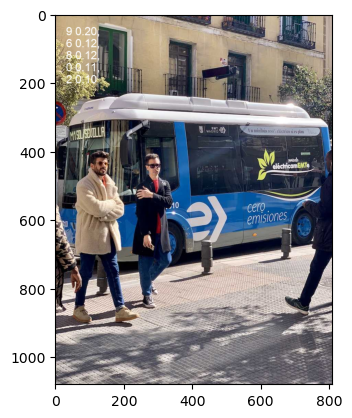

In [28]:
classification_result = model('https://ultralytics.com/images/bus.jpg')


# Exibir a imagem resultante com as previsões desenhadas
img = classification_result[0].plot()
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_result)

#
---

### &#x1F40D; (C) INFERÊNCIAS UTILIZANDO PYTHON >>> SEGMENTAÇÃO DE OBJETOS <<<
YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.

Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it


In [4]:
import ultralytics
from ultralytics import YOLO
import cv2
# from PIL import Image
import matplotlib.pyplot as plt

In [1]:
model = YOLO('yolov8n-seg.pt')                  # load a pretrained YOLOv8n segmentation model
model.train(data='coco8-seg.yaml', epochs=3)    # train the model

Ultralytics YOLOv8.2.66  Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco8-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

c:\Users\saothalm\AppData\Local\miniconda3\envs\env_yolo\lib\site-packages\ultralytics\engine\trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\saothalm\Documents\ia_visao_thayna\trial\datasets\coco8-seg\labels\train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning C:\Users\saothalm\Documents\ia_visao_thayna\trial\datasets\coco8-seg\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs\segment\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.107      3.179      2.862      1.403         25        640: 100%|██████████| 1/1 [00:02<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all          4         17      0.701      0.633      0.752      0.475      0.664      0.533      0.611      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.174      2.643      2.402      1.356         23        640: 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all          4         17      0.702      0.633      0.745      0.486       0.69      0.617      0.634      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.9311      2.302      3.567      1.296         15        640: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all          4         17      0.707      0.617      0.745      0.489      0.707      0.617      0.634      0.438



3 epochs completed in 0.003 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 7.1MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 7.1MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics YOLOv8.2.66  Python-3.8.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i5-1145G7 2.60GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


                   all          4         17      0.709      0.617      0.745      0.489      0.709      0.617      0.634      0.437
                person          3         10      0.572        0.7      0.676      0.308      0.572        0.7      0.595      0.261
                   dog          1          1      0.819          1      0.995      0.796      0.819          1      0.995      0.895
                 horse          1          2      0.307          1      0.995      0.407      0.307          1      0.414      0.108
              elephant          1          2          1          0      0.559      0.335          1          0      0.559      0.335
              umbrella          1          1      0.557          1      0.995      0.895      0.557          1      0.995      0.895
          potted plant          1          1          1          0      0.249      0.189          1          0      0.249      0.129
Speed: 2.5ms preprocess, 103.2ms inference, 0.0ms loss, 1.2ms postpro

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021296A8B2E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,  

In [5]:
segmentation_result = model('https://ultralytics.com/images/bus.jpg')

# Exibir a imagem resultante com as previsões desenhadas
img = segmentation_result[0].plot()
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_result)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\saothalm\Documents\ia_visao_thayna\notebooks\4_Deteccao_Objetos\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 92.0ms
Speed: 0.0ms preprocess, 92.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
